In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch02\02_01 Begin\opencv-logo.png")

#split and merge
b,r,g =cv2.split(img)
img = cv2.merge([r,g,b])

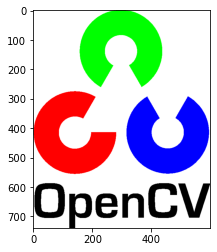

In [3]:
plt.imshow(img)

In [4]:
cv2.imwrite("output.png",img) # gives output in C:\Users\prakh\output.png

True

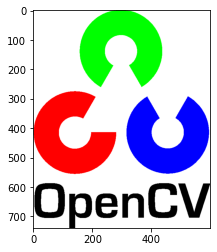

In [5]:
plt.imshow(img)

In [6]:
img.shape # rows, columns, channels(rgb)

(739, 600, 3)

In [7]:
len(img) #rows

739

In [8]:
len(img[0]) #columns

600

In [9]:
len(img[0][0]) #channels would be 4 if transparent layer is there

3

In [10]:
img.dtype

dtype('uint8')

In [11]:
img.size #no. of data points 739*600*3

1330200

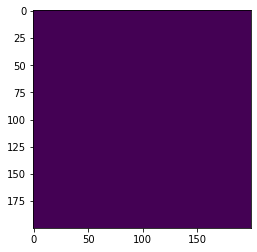

In [12]:
#making a black img
black= np.zeros([200,200,1], np.uint8)
plt.imshow(black)
#print(black[0,0,:])

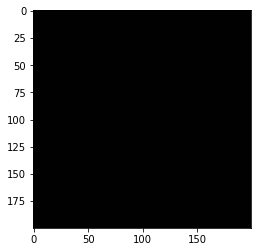

In [13]:
#making a black img
black= np.ones([200,200,3],'uint8')
plt.imshow(black)
#print(black[0,0,:])

[1 1 1]


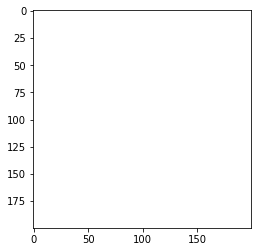

In [14]:
ones= np.ones([200,200,3],'uint8')
ones *=2**16-1
plt.imshow(ones)
print(black[0,0,:])

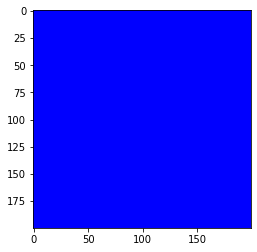

In [15]:
color= ones.copy()
color[:,:] =(0,0,255) #red ,green ,blue
plt.imshow(color)

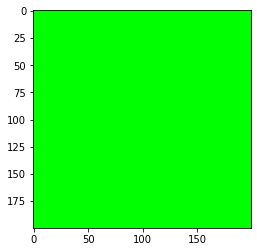

In [16]:
color= ones.copy()
color[:,:] =(0,255,0) #red ,green ,blue
plt.imshow(color)

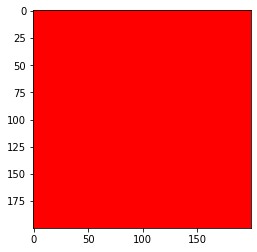

In [17]:
color= ones.copy()
color[:,:] =(255,0,0) #red ,green ,blue
plt.imshow(color)

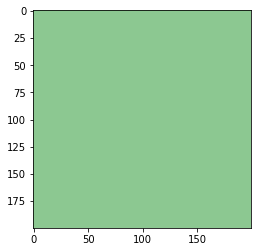

In [18]:
color= ones.copy()
color[:,:] =(140,200,145) #red ,green ,blue combination makes any colour
plt.imshow(color)

# New ---butterfly 

In [19]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch02\02_04 Begin\butterfly.jpg")

#split and merge
b,r,g =cv2.split(img)
img = cv2.merge([r,g,b])

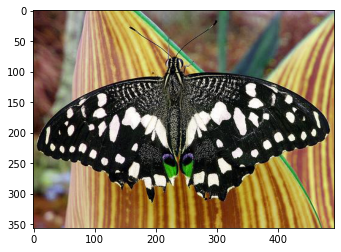

In [20]:
plt.imshow(img)

In [21]:
height,width,channels = img.shape
b,g,r = cv2.split(img)

rgb_split = np.empty([height,width*3,3],'uint8')

rgb_split[:, 0:width] = cv2.merge([b,b,b])
rgb_split[:, width:width*2] = cv2.merge([g,g,g])
rgb_split[:, width*2:width*3] = cv2.merge([r,r,r])

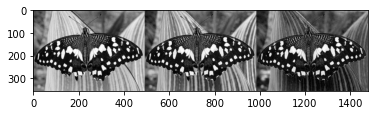

In [22]:
plt.imshow(rgb_split) #spliting all colours in red blue and green formats 

In [23]:
# hue saturation colour
hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(hsv)
#hsv= cv2.concatenate((h,s,v),axis=1)

In [24]:
rgb_split[:, 0:width] = cv2.merge([h,h,h])
rgb_split[:, width:width*2] = cv2.merge([s,s,s])
rgb_split[:, width*2:width*3] = cv2.merge([v,v,v])

In [25]:
hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(hsv)
rgb_split[:, 0:width] = cv2.merge([h,h,h])
rgb_split[:, width:width*2] = cv2.merge([s,s,s])
rgb_split[:, width*2:width*3] = cv2.merge([v,v,v])

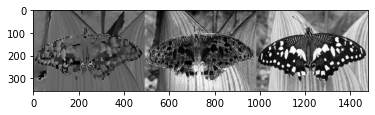

In [26]:
plt.imshow(rgb_split)

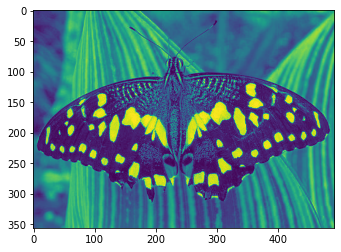

In [27]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [28]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch02\02_04 Begin\butterfly.jpg")

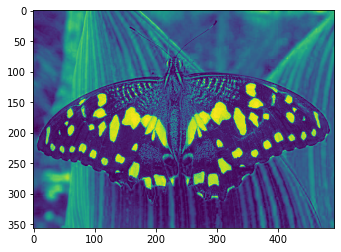

In [29]:
#manual spliting is much more faster than the cv2.split function
b= img[:,:,0]
g= img[:,:,1]
r= img[:,:,2]
plt.imshow(b)

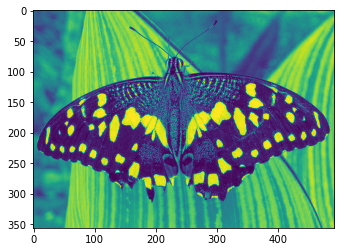

In [30]:
plt.imshow(g)

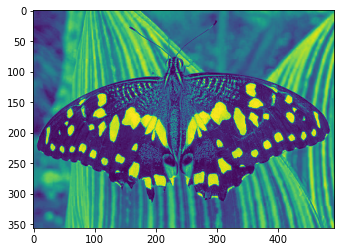

In [31]:
plt.imshow(r)

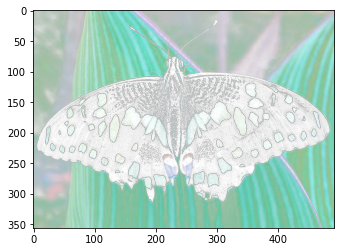

In [32]:
#if we wnat to make the green part transparent we can put layer of green over bgr  similar for blue and red
transparent= cv2.merge((b,g,r,g))
plt.imshow(transparent)

# NOISE REDUCTION

# GAUSSIAN BLUR

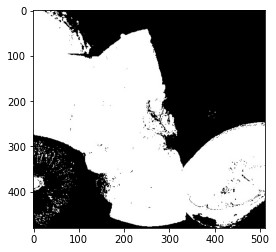

In [33]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch02\02_06 Begin\thresh.jpg")
plt.imshow(img)

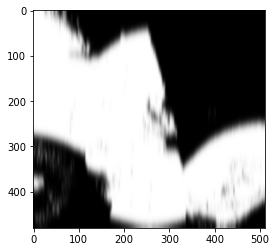

In [34]:
img = cv2.GaussianBlur(img,(5,55),0) 
#(img,(5,55),0)<---need to be all odd values 5,55 will blur img little on x axis and more on y axis
plt.imshow(img)

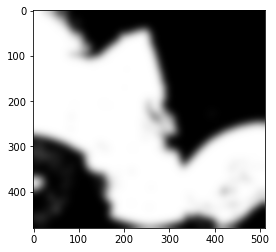

In [35]:
img = cv2.GaussianBlur(img,(55,5),0) 
#(img,(55,5),0)<---need to be all odd values 55,5 will blur img more on x axis and little on y axis
plt.imshow(img)

# dilation eats/removes the pixel exposes the background and 


# erosion removes the backround adds new pixels

# background is white and img pixel are black

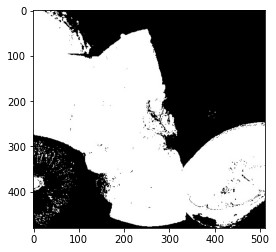

In [36]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch02\02_06 Begin\thresh.jpg")
plt.imshow(img)

In [37]:
kernel= np.ones((5,5),'uint8')

In [38]:
dilate= cv2.dilate(img,kernel,iterations = 4)
erode = cv2.erode(img, kernel, iterations = 3)

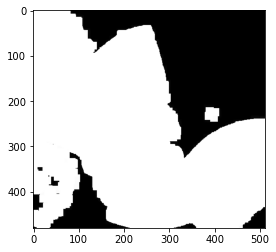

In [39]:
plt.imshow(dilate)

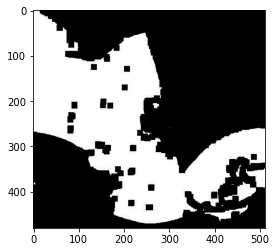

In [40]:
plt.imshow(erode)

# SCALING: RESIZING IMAGES

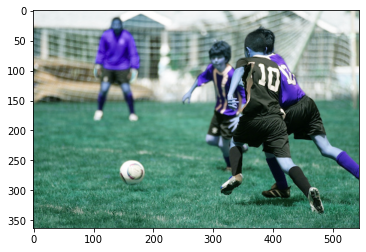

In [41]:
players= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch02\02_07 Begin\players.jpg")
plt.imshow(players)

In [42]:
#split and merge
r,g,b =cv2.split(players)
players = cv2.merge([b,r,g])

592416


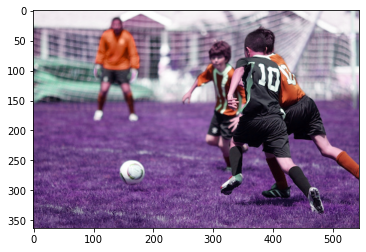

In [43]:
print(players.size)
plt.imshow(players)

148512


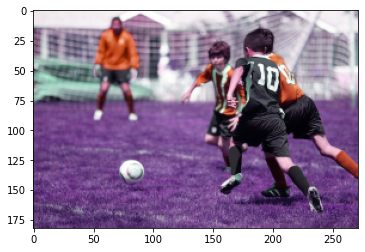

In [44]:
half= cv2.resize(players,(0,0),fx=0.5, fy=0.5)
print(half.size)
plt.imshow(half)

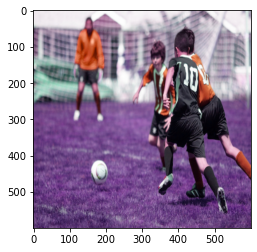

In [45]:
strech= cv2.resize(players,(600,600))
plt.imshow(strech)

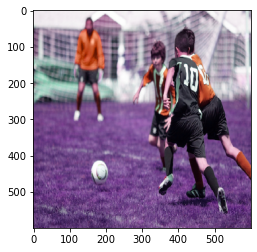

In [46]:
strech_i= cv2.resize(players,(600,600),interpolation=cv2.INTER_NEAREST)
#quality of this streched image is much better than the above 
plt.imshow(strech_i)

# ROTATION

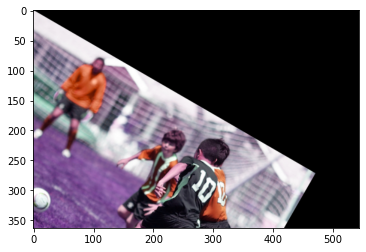

In [47]:
m=cv2.getRotationMatrix2D((0,0),-30,1) #((0,0)pivot point,-30 degrees,1)
rotated= cv2.warpAffine(players,m,(players.shape[1],players.shape[0]))
plt.imshow(rotated)
#rotated from 0,0 origin to 30 degrees

In [48]:
players.shape

(363, 544, 3)

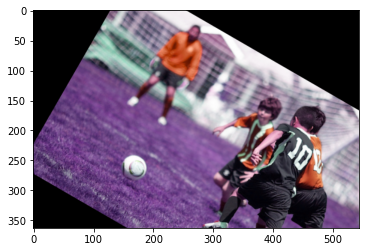

In [49]:
#center rotated
m=cv2.getRotationMatrix2D((181,272),-30,1) #((length/2,breadth/2)pivot point,-30 degrees,1)
rotated= cv2.warpAffine(players,m,(players.shape[1],players.shape[0]))
plt.imshow(rotated)

# video capturing

In [50]:
#cap = cv2.VideoCapture(0)

#while(True):
#    ret, frame = cap.read()

#    frame = cv2.resize(frame, (0,0), fx=0.5,fy=0.5)
#    plt.imshow("Frame",frame)

#    ch = cv2.waitKey(1)
#    if ch & 0xFF == ord('q'):
#        break

#cap.release()
#cv2.destroyAllWindows()

# BINARY IMAGES

In [51]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_02 Begin\detect_blob.png",0)
height,width= img.shape[0:2]

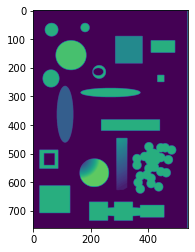

In [52]:
plt.imshow(img)

In [53]:
#slower method using loops

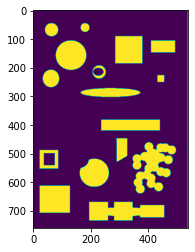

In [54]:
binary= np.zeros([height,width,1],'uint8')
thresh=85

for row in range (0,height):
    for col in range (0,width):
        if img[row][col] >thresh:
            binary[row][col]=255

plt.imshow(binary)     
#we can see some of the objects with shading have been trncated while some whose values are less than threshold completly vanished 

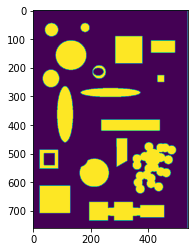

In [55]:
binary= np.zeros([height,width,1],'uint8')
thresh=75 # lowering threshold

for row in range (0,height):
    for col in range (0,width):
        if img[row][col] >thresh:
            binary[row][col]=255

plt.imshow(binary)     
#vertical oval is back

In [56]:
#faster method using built in functions

In [57]:
ret, thresh=cv2.threshold(img,85,255,cv2.THRESH_BINARY) #<--- 85 being the thresh value
# read the documentation of this function

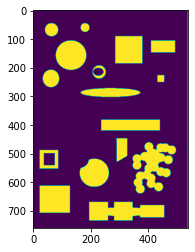

In [58]:
plt.imshow(thresh)

# Adaptive thresholding

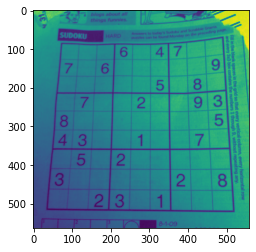

In [59]:
#new image
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_03 Begin\sudoku.png")
sud = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(sud)

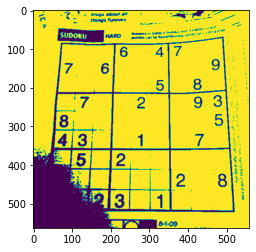

In [60]:
ret, thresh=cv2.threshold(sud,70,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

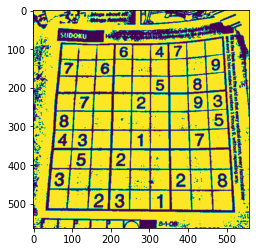

In [61]:
thresh_adpt= cv2.adaptiveThreshold(sud,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
plt.imshow(thresh_adpt)

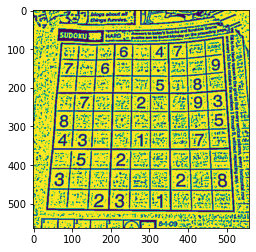

In [62]:
th2 = cv2.adaptiveThreshold(sud,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th2)

# DETECTING SKIN TONES

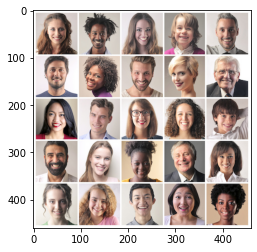

In [63]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_04 End\faces.jpeg",1)
b,g,r= cv2.split(img)
faces= cv2.merge((r,g,b))
plt.imshow(faces)

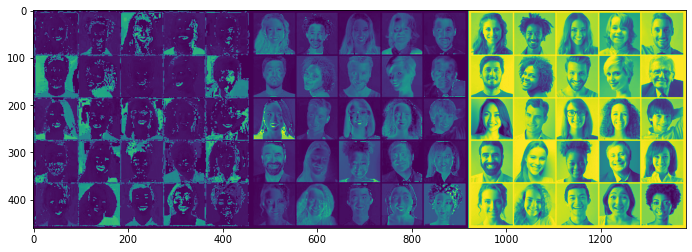

In [64]:
hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]
hsv_split= np.concatenate((h,s,v),axis=1)
plt.figure(figsize = (40,4)) # make the plot visible for the user
plt.imshow(hsv_split)
#1st is hue  followed by saturation and value  
#red is represented by very low values(0) or very high values(255) with green and blue as more gray values

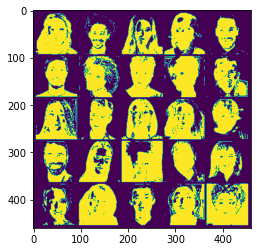

In [65]:
#now we will follow and apply composite filters in order to capure diffternt areas/colours of skin
ret, min_sat = cv2.threshold(s,40,255, cv2.THRESH_BINARY) #anything with value greater than 40 will appear white
plt.imshow(min_sat)
#notice the shoulder of 2X5 is illuminated

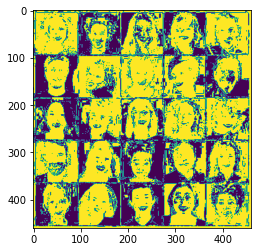

In [66]:
ret, max_hue = cv2.threshold(h,15, 255, cv2.THRESH_BINARY_INV) 
#anything with value less than 15 will appear white as it is inverse filter
plt.imshow(max_hue)
#notice the shoulder of 2X5 is darkened

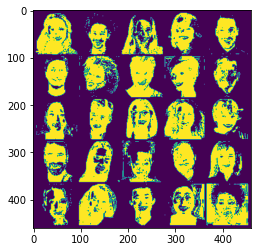

In [67]:
final = cv2.bitwise_and(min_sat,max_hue)
plt.imshow(final)
#notice the shoulder of 2X5 is eliminated when filters are combined

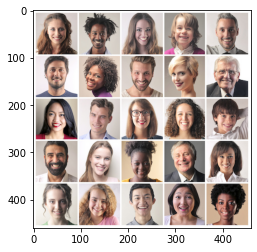

In [68]:
plt.imshow(faces) #orignal

In [69]:
#this is not the most robust technique to detect faces which can be done better by ML and liht variant method

# CONTOURS
#ITERATIVE ENERGY REDUCTION ALGORITHM    
#NEIGHBOURS AND CONNECTED PIXELS 

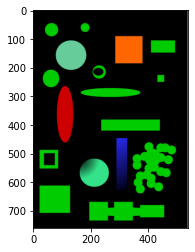

In [70]:
blob= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_02 Begin\detect_blob.png",1)
plt.imshow(blob)

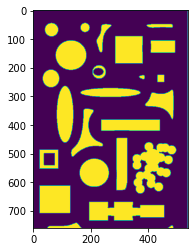

In [71]:
blob = cv2.cvtColor(blob, cv2.COLOR_BGR2GRAY)
thresh_adpt= cv2.adaptiveThreshold(blob,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
plt.imshow(thresh_adpt)

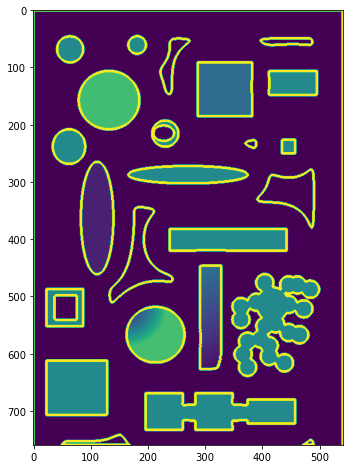

In [72]:
contours, hierarchy = cv2.findContours(thresh_adpt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = blob.copy()
index = -1
thickness = 4
color = (255, 255,0)

cv2.drawContours(img2, contours, index, color, thickness)
plt.figure(figsize = (40,8))
plt.imshow(img2)

Area {86.5} perimeter {45.55634891986847}
Area {959.5} perimeter {251.8406196832657}
Area {13091.5} perimeter {754.0416301488876}
Area {10069.5} perimeter {401.41421353816986}
Area {7780.0} perimeter {329.22034430503845}
Area {4160.0} perimeter {258.0}
Area {1672.0} perimeter {160.48528122901917}
Area {14515.0} perimeter {1225.768675327301}
Area {6569.0} perimeter {441.5979790687561}
Area {7701.0} perimeter {484.8284270763397}
Area {5581.0} perimeter {500.9604583978653}
Area {5019.0} perimeter {357.2792183160782}
Area {5019.0} perimeter {444.3675308227539}
Area {8826.0} perimeter {449.76449966430664}
Area {181.0} perimeter {54.62741661071777}
Area {551.5} perimeter {93.41421353816986}
Area {2708.5} perimeter {194.75230729579926}
Area {1644.5} perimeter {152.1248904466629}
Area {767.0} perimeter {105.74011433124542}
Area {3505.5} perimeter {251.0710676908493}
Area {8556.0} perimeter {345.70562493801117}
Area {8909.0} perimeter {379.65685415267944}
Area {924.0} perimeter {196.28427064418

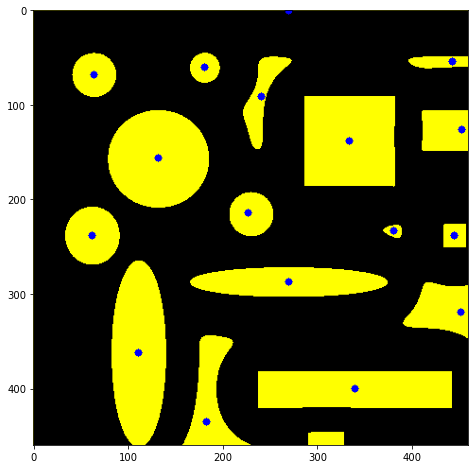

In [73]:
#making a raw canvas
obj= np.zeros((img.shape[0],img.shape[1], 3),'uint8')

for c in contours:
    cv2.drawContours(obj, [c], -1, color, -1 ) #(obj, [c] each contour 1 by 1, -1, color, -1 for completly filling the contours )
    area = cv2.contourArea(c) #area of each contour
    perimeter= cv2.arcLength(c,True) #perimeter
    M=cv2.moments(c)
    #determining mass distribution along x and y axis
    cx= int(M['m10']/M['m00']) #mass on x axis/ m00 is the point of total mass
    cy= int(M['m01']/M['m00']) #mass on y axis/ m00 is the point of total mass
    cv2.circle (obj,(cx,cy),4,(0,0,255),-1) # draw a red (0,0,255) circle of radius 4 filled(-1)
    print(f'Area',{area},'perimeter',{perimeter})
    
plt.figure(figsize = (40,8))
plt.imshow(obj)

In [74]:
#the information of the areas and perimeters can be used to build classifiers and 
#find circularity of the object or determine if the objects are same or not

# canny edge detection

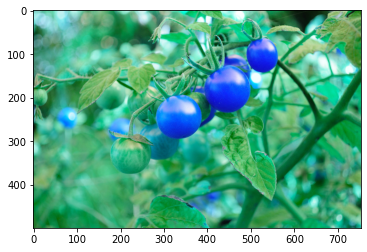

In [75]:
tom= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_08 End\tomatoes.jpg",1)
#b,g,r= cv2.split(tom)
#tom= cv2.merge((r,g,b))
plt.imshow(tom)

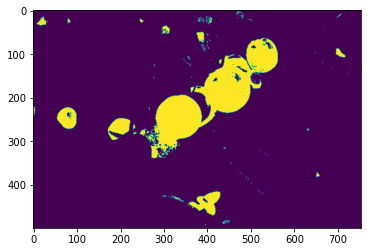

In [76]:
hsv= cv2.cvtColor(tom,cv2.COLOR_BGR2HSV)
res, thresh = cv2.threshold(hsv[:, :, 0], 25, 255, cv2.THRESH_BINARY_INV)
plt.imshow( thresh)

#tomatoes have been changed into asingle object wherever the red colour peaks whereas it should be multiple 

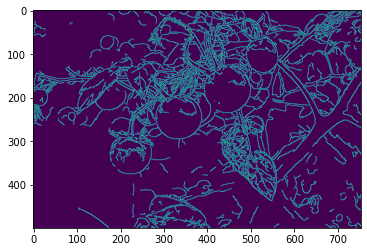

In [77]:
edges = cv2.Canny(tom, 100, 200, apertureSize=3) #treshold b/w 100 to 200
plt.imshow(edges)
#better result than threshold

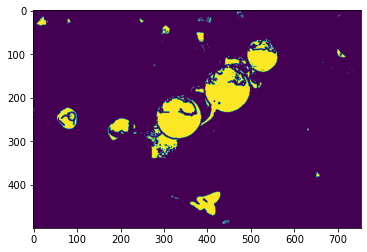

In [78]:
#taking a difference of canny edges and threshold
edge_inv = 255 - edges #inverting the edges
# Using erosion to increase size of the 'border'
kernel = np.ones((3, 3), 'uint8')
erode = cv2.erode(edge_inv, kernel, iterations=1)
canny_thresh = cv2.bitwise_and(erode, thresh)
plt.imshow(canny_thresh)

In [79]:
contours, hierarchy = cv2.findContours(canny_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

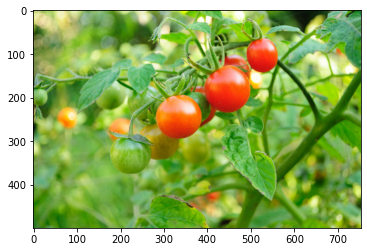

In [80]:
tom2= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_08 End\tomatoes.jpg",1)
b,g,r= cv2.split(tom2)
tom2= cv2.merge((r,g,b))
plt.imshow(tom2)

Area:  1788.5
Area:  1518.5
Area:  966.5
Area:  1436.0
Area:  517.5
Area:  6313.5
Area:  6930.0
Area:  307.0
Area:  2636.0
Area:  374.0


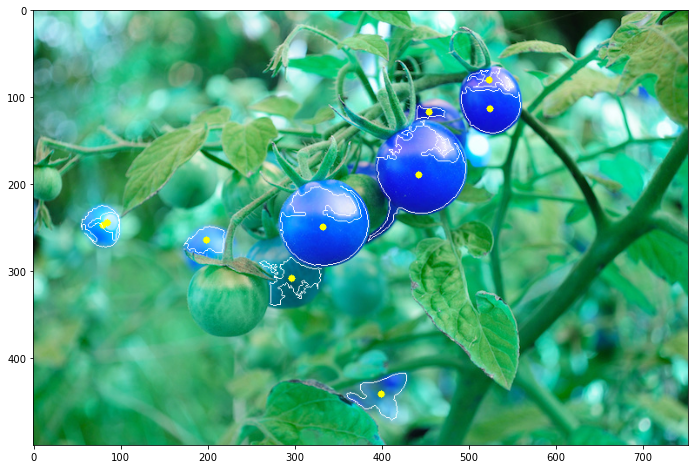

In [81]:
objects = tom.copy()
for c in contours:
    area = cv2.contourArea(c)
    if area < 300:# This contour is around something too small for our interest
        continue
    print("Area: ", area)
    cv2.drawContours(objects, [c], -1, (255, 255, 255), 1)
    M=cv2.moments(c)
    #determining mass distribution along x and y axis
    cx= int(M['m10']/M['m00']) #mass on x axis/ m00 is the point of total mass
    cy= int(M['m01']/M['m00']) #mass on y axis/ m00 is the point of total mass
    cv2.circle (objects,(cx,cy),4,(255,255,0),-1) # draw a red (0,0,255) circle of radius 4 filled(-1)
plt.figure(figsize = (40,8))
plt.imshow(objects)

In [82]:
#the code has correctly picked up the ripe tomatoes 
#while there are some miscalculaton where the rightmost tomatoes is categorized into 2 different objects

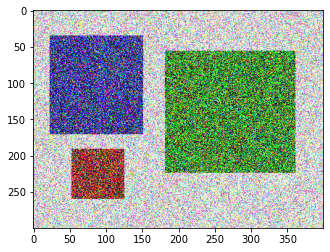

In [83]:
fuzzy= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_10 Begin\fuzzy.png",1)
plt.imshow(fuzzy)

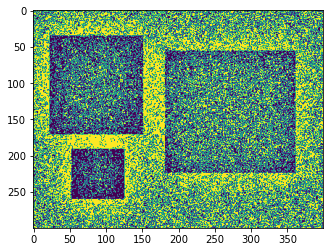

In [84]:
fuzzy1 = cv2.cvtColor(fuzzy, cv2.COLOR_BGR2GRAY)
thresh_adpt= cv2.adaptiveThreshold(fuzzy1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,125,1)
plt.imshow(thresh_adpt)

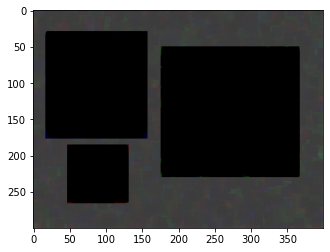

In [85]:
kernel= np.ones((5,5),'uint8')
dilate= cv2.dilate(fuzzy,kernel,iterations = 1)
erode = cv2.erode(fuzzy, kernel, iterations = 3)
plt.imshow(erode)

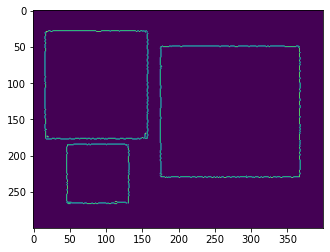

In [86]:
edges = cv2.Canny(erode, 130, 200, apertureSize=3) #treshold b/w 100 to 200
plt.imshow(edges)

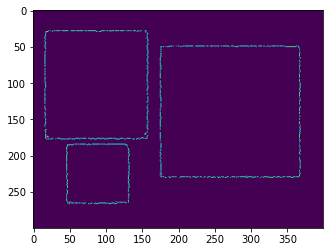

In [87]:
edge_inv = 255 - edges
canny_thresh = cv2.bitwise_and(edges, thresh_adpt)
plt.imshow(canny_thresh)

In [88]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


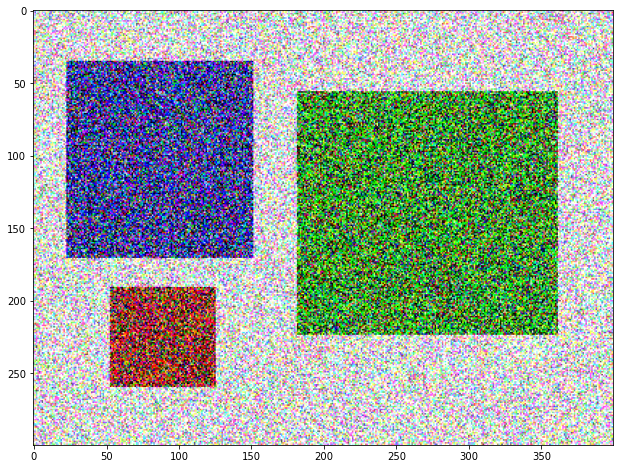

In [89]:
contours, hierarchy = cv2.findContours(canny_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objects = fuzzy.copy()
for c in contours:
    area = cv2.contourArea(c)
    if area < 300:# This contour is around something too small for our interest
        continue
    print("Area: ", area)
    cv2.drawContours(objects, [c], -1, (255, 255, 255), 1)
    M=cv2.moments(c)
    #determining mass distribution along x and y axis
    cx= int(M['m10']/M['m00']) #mass on x axis/ m00 is the point of total mass
    cy= int(M['m01']/M['m00']) #mass on y axis/ m00 is the point of total mass
    cv2.circle (objects,(cx,cy),4,(255,255,0),-1) # draw a red (0,0,255) circle of radius 4 filled(-1)
plt.figure(figsize = (40,8))
plt.imshow(objects)

# FACE AND FEATURE DETECTION

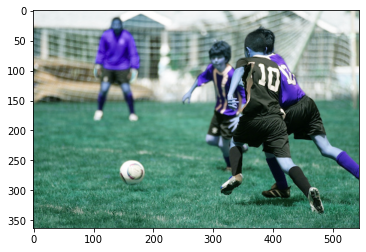

In [97]:
tem=cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch04\04_03 Begin\template.jpg")
players=cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch04\04_03 Begin\players.jpg")
plt.imshow(players)

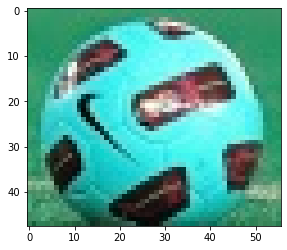

In [96]:
plt.imshow(tem)

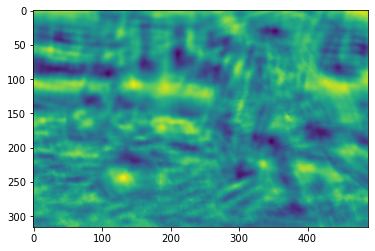

In [117]:
result= cv2.matchTemplate(players,tem,cv2.TM_CCOEFF_NORMED)
plt.imshow(result)
# the brightest part of the image is where the template matches 
#the size of the result matrix is smaller than the orignal image but bigger than the template

(132, 243) 0.43475285172462463


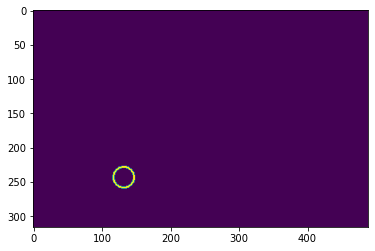

In [116]:
min_val, max_val,min_loc, max_loc=cv2.minMaxLoc(result)
print(max_loc,max_val)
cv2.circle(result,max_loc,15,255,2)
plt.imshow(result)

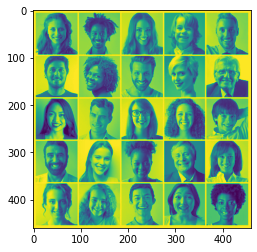

In [191]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_04 End\faces.jpeg",1)
faces = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(faces)

In [198]:
cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
cascade_eye=cv2.CascadeClassifier("haarcascade_eye.xml")
#cascade_eye.detectMultiScale()
faces= cascade.detectMultiScale(faces,scaleFactor=1.07,minNeighbors=5,minSize=((40,40)))
print(len(faces))
for (x,y,w,h) in faces:
    gray= faces[y:y+h ,x:x+w]
    colour= img[y:y+h ,x:x+w]
    cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),2)
    eyes=cascade_eye.detectMultiScale(gray,1.1,5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(colour, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.figure(figsize = (40,8))
plt.imshow(img)

error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\objdetect\src\cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'cv::CascadeClassifierImpl::detectMultiScale'


# Eye Tracking Challenge

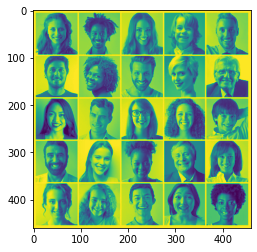

In [241]:
img= cv2.imread(r"D:\opencv\Ex_Files_OpenCV_Python_Developers\Exercise Files\Ch03\03_04 End\faces.jpeg",1)
faces = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(faces)

13


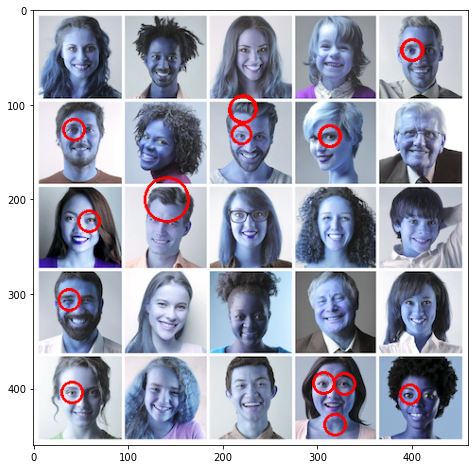

In [224]:
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")
eyes = eye_cascade.detectMultiScale(faces, scaleFactor=1.01,minNeighbors=20,minSize=(10,10))
print(len(eyes))

for (x, y, w, h) in eyes:
    xc = (x + x+w)/2
    yc = (y + y+h)/2
    radius = w/2
    cv2.circle(img, (int(xc),int(yc)), int(radius), (255,0,0), 2)
plt.figure(figsize = (40,8))
plt.imshow(img)

In [242]:
cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
cascade_eye=cv2.CascadeClassifier("haarcascade_eye.xml")
#cascade_eye.detectMultiScale()

In [243]:
cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
cascade_eye=cv2.CascadeClassifier("haarcascade_eye.xml")
faces= cascade.detectMultiScale(faces,scaleFactor=1.07,minNeighbors=5,minSize=((40,40)))
print(len(faces))
for (x,y,w,h) in faces:
    gray= faces[y:y+h ,x:x+w]
    colour= img[y:y+h ,x:x+w]
    cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),2)
    eyes=cascade_eye.detectMultiScale(gray, scaleFactor=1.01,minNeighbors=20,minSize=(10,10))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(colour, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.figure(figsize = (40,8))
plt.imshow(img)

24


error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\objdetect\src\cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'cv::CascadeClassifierImpl::detectMultiScale'
